# Cho 2 tập tin là hacide_train.csv và hacide_test.csv. 
# Dữ liệu này được dùng để xây dựng model dự đoán và kiểm tra một mẫu là hiếm hay phổ biến.

## Đọc dữ liệu hacide_train.csv, xem xét tính cân bằng giữa hai loại mẫu hiếm và phổ biến. 
## Trực quan hóa. Nhận xét.

## Nếu 2 loại mẫu này không cân bằng, hãy chọn một phương pháp cân bằng dữ liệu và thực hiện. Giải thích lý do. Trực quan hóa kết quả.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')

In [5]:
hacide = pd.read_csv('data7/Ex1_Hacide/hacide_train.csv', index_col=0)
hacide

,cls,x1,x2
1,0,0.200798,0.678038
2,0,0.016620,1.576558
3,0,0.228725,-0.559534
4,0,0.126379,-0.093814
5,0,0.600821,-0.298395
...,...,...,...
996,1,-2.296385,-0.505279
997,1,1.022486,-1.802279
998,1,-1.549866,-2.899393
999,1,1.961917,-1.920985


In [9]:
hacide['cls'].value_counts()

cls
0    980
1     20
Name: count, dtype: int64

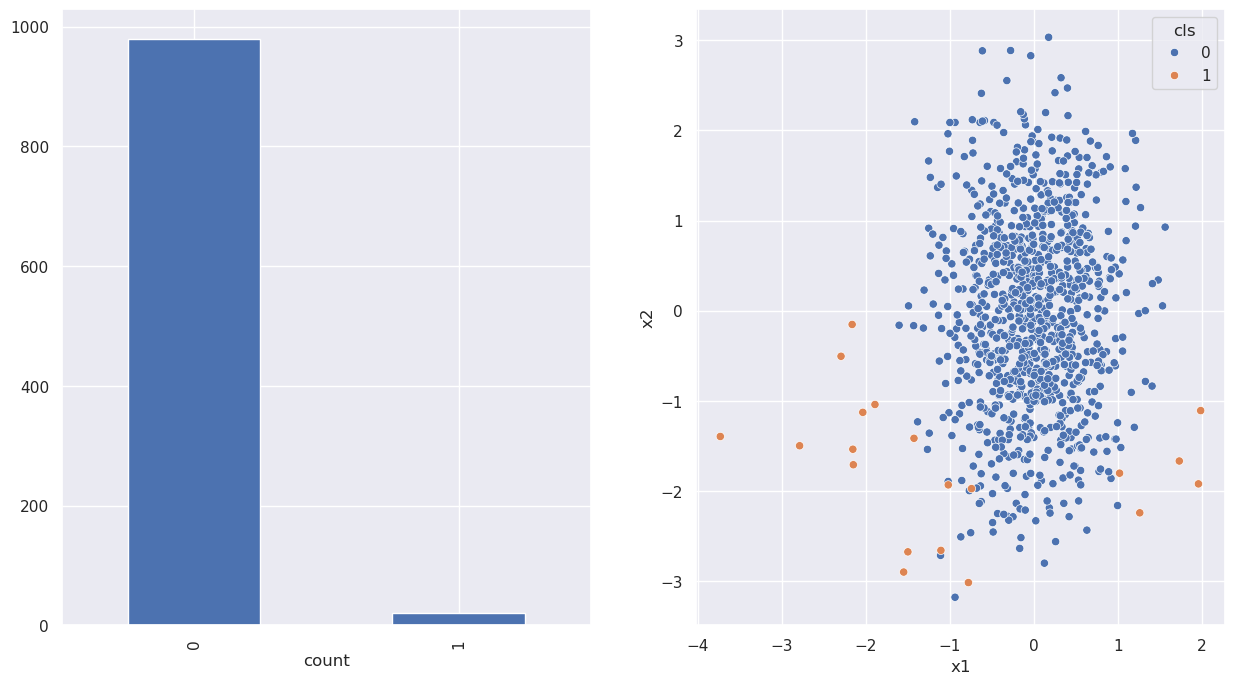

In [26]:
sbn.set_theme(style='darkgrid')
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
hacide['cls'].value_counts().plot.bar()
plt.xlabel('count')

plt.subplot(1,2,2)
sbn.scatterplot(data=hacide, x='x1', y='x2', hue='cls')
plt.show()

## <span style='color:red'>The sample size of class "1" is very small => Use oversampling to up sample it

In [12]:
from imblearn.over_sampling import SMOTE

In [16]:
smote = SMOTE(random_state=0)

x = hacide[['x1', 'x2']]
y = hacide['cls']

x_resample, y_resample = smote.fit_resample(x, y)

hacide_new = pd.DataFrame(x_resample, columns=['x1', 'x2'])
hacide_new['cls'] = y_resample

hacide_new

,x1,x2,cls
0,0.200798,0.678038,0
1,0.016620,1.576558,0
2,0.228725,-0.559534,0
3,0.126379,-0.093814,0
4,0.600821,-0.298395,0
...,...,...,...
1955,-2.232242,-0.334275,1
1956,-1.518209,-2.757232,1
1957,1.286534,-1.752162,1
1958,-1.130383,-1.790801,1


In [17]:
hacide_new['cls'].value_counts()

cls
0    980
1    980
Name: count, dtype: int64

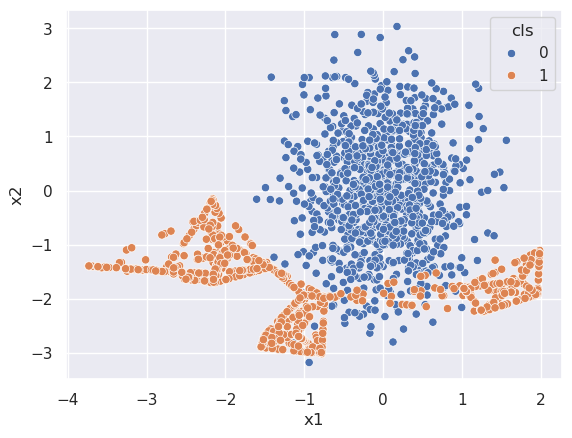

In [29]:
sbn.scatterplot(data=hacide_new, x='x1', y='x2', hue='cls');

## <span style='color:red'> Build Logistic Regression model to evaluate Oversampling effectiveness

### <span style='color:yellow'> train with RAW_IMBALANCED data

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [46]:
log_imblanced = LogisticRegression()
log_imblanced.fit(hacide[['x1', 'x2']], hacide['cls'])

LogisticRegression()

In [47]:
y_pred_raw = log_imblanced.predict(hacide[['x1', 'x2']])

print('Accuracy score trained with imbalanced data =', accuracy_score(hacide['cls'], y_pred=y_pred_raw))
print()
print('Confusion matrix trained with imbalanced data:\n', confusion_matrix(hacide['cls'], y_pred=y_pred_raw))
print()
print('Classification report trained with imbalanced data:\n', classification_report(hacide['cls'], y_pred=y_pred_raw))

Accuracy score trained with imbalanced data = 0.983

Confusion matrix trained with imbalanced data:
 [[979   1]
 [ 16   4]]

Classification report trained with imbalanced data:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.80      0.20      0.32        20

    accuracy                           0.98      1000
   macro avg       0.89      0.60      0.66      1000
weighted avg       0.98      0.98      0.98      1000



### => As we can see, the precision is high for both class, but the recall for class "1" is very low, only 20%

ROC_AUC score trained with imbalanced data = 0.8789285714285715



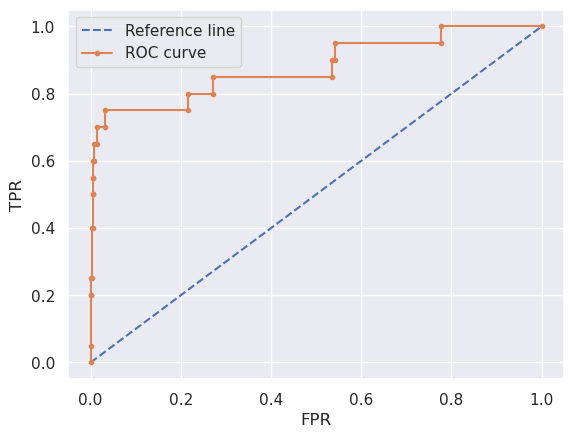

In [59]:
y_prob_raw = log_imblanced.predict_proba(hacide[['x1', 'x2']])

print("ROC_AUC score trained with imbalanced data =",roc_auc_score(hacide['cls'], y_prob_raw[:,1]))
print()

fpr_raw, tpr_raw, threshold_raw = roc_curve(hacide['cls'], y_prob_raw[:,1])

plt.plot([0,1], [0,1], linestyle='--', label='Reference line')
plt.plot(fpr_raw, tpr_raw, marker='.', label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

### ROC_AUC score is high ~0.88

### <span style='color:yellow'> train with OVERSAMPLE data (balanced)

In [52]:
log_upsample = LogisticRegression()
log_upsample.fit(hacide_new[['x1','x2']], hacide_new['cls'])

LogisticRegression()

In [56]:
y_pred_upsamp, y_prob_upsamp = log_upsample.predict(hacide_new[['x1','x2']]), log_upsample.predict_proba(hacide_new[['x1','x2']])

print('Accuracy score trained with OverSampling data =', accuracy_score(hacide_new['cls'], y_pred=y_pred_upsamp))
print()
print('Confusion matrix trained with OverSampling data:\n', confusion_matrix(hacide_new['cls'], y_pred=y_pred_upsamp))
print()
print('Classification report trained with OverSampling data:\n', classification_report(hacide_new['cls'], y_pred=y_pred_upsamp))

Accuracy score trained with OverSampling data = 0.8770408163265306

Confusion matrix trained with OverSampling data:
 [[829 151]
 [ 90 890]]

Classification report trained with OverSampling data:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       980
           1       0.85      0.91      0.88       980

    accuracy                           0.88      1960
   macro avg       0.88      0.88      0.88      1960
weighted avg       0.88      0.88      0.88      1960



### => After OverSampling with SMOTE, the accuracy score decrease a little bit, 
### but the recall of class "1" now increases significantly, up to 91%

ROC_AUC score trained with OverSampled data = 0.9405716368179925



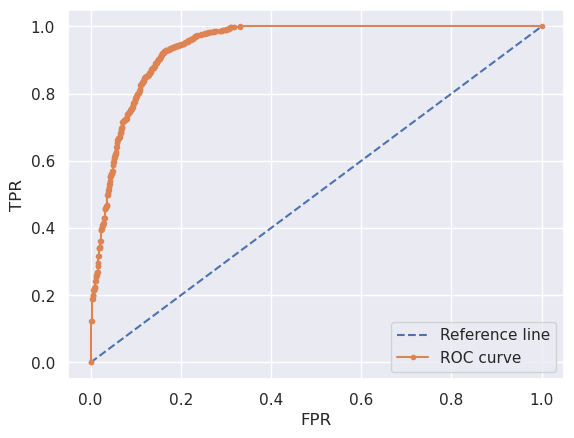

In [60]:
print("ROC_AUC score trained with OverSampled data =",roc_auc_score(hacide_new['cls'], y_prob_upsamp[:,1]))
print()

fpr_upsamp, tpr_upsamp, threshold_upsamp = roc_curve(hacide_new['cls'], y_prob_upsamp[:,1])

plt.plot([0,1], [0,1], linestyle='--', label='Reference line')
plt.plot(fpr_upsamp, tpr_upsamp, marker='.', label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

### => After OverSampling with SMOTE, the ROC_AUC score has increased significantly, the plot line also changed positively

## <span style='color:red'> Build DecisionTree model to train imbalanced data
## (DecisionTree is not affected by imbalanced data)

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
tree_model = DecisionTreeClassifier()
tree_model.fit(hacide[['x1','x2']], hacide['cls'])

DecisionTreeClassifier()

In [64]:
y_pred_tree = tree_model.predict(hacide[['x1','x2']])
y_prob_tree = tree_model.predict_proba(hacide[['x1','x2']])

print('Accuracy score of DecisionTree trained with imbalanced data =', accuracy_score(hacide.cls, y_pred_tree))
print()
print('Confusion matrix of DecisionTree trained with imbalanced data:\n', confusion_matrix(hacide.cls, y_pred_tree))
print()
print('Classification report of DecisionTree trained with imbalanced data:\n', classification_report(hacide.cls, y_pred_tree))

Accuracy score of DecisionTree trained with imbalanced data = 1.0

Confusion matrix of DecisionTree trained with imbalanced data:
 [[980   0]
 [  0  20]]

Classification report of DecisionTree trained with imbalanced data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00        20

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



ROC_AUC score of DecisionTree trained with imbalanced data = 1.0



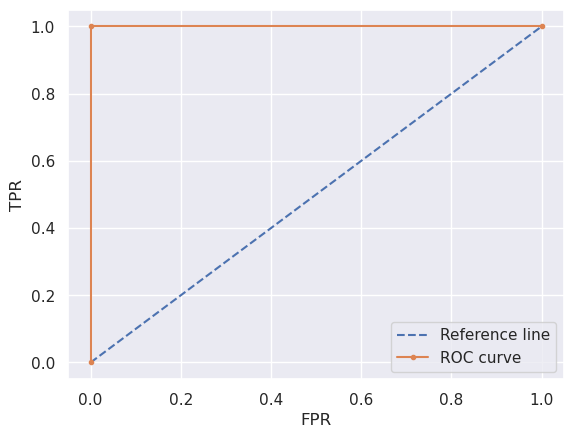

In [65]:
print("ROC_AUC score of DecisionTree trained with imbalanced data =",roc_auc_score(hacide['cls'], y_prob_tree[:,1]))
print()

fpr_tree, tpr_tree, threshold_tree = roc_curve(hacide['cls'], y_prob_tree[:,1])

plt.plot([0,1], [0,1], linestyle='--', label='Reference line')
plt.plot(fpr_tree, tpr_tree, marker='.', label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

## ROC_AUC score and curve are very high, also precision and recall. Because DecisionTree model can work well with imbalanced dataset